# Task: Models and Tokenizers

In [3]:
!pip install torch

  Using cached torch-1.13.1-cp37-cp37m-manylinux1_x86_64.whl (887.5 MB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl (849 kB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl (317.1 MB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl (21.0 MB)


In [4]:
!pip install torchinfo

  Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)


In [5]:
!pip install transformers

  Using cached transformers-4.30.2-py3-none-any.whl (7.2 MB)
  Using cached huggingface_hub-0.15.1-py3-none-any.whl (236 kB)
  Using cached tokenizers-0.13.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Using cached safetensors-0.3.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.1
    Uninstalling packaging-20.1:
      Successfully uninstalled packaging-20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
spyder 4.0.1 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.0.1 requires pyqtwebengine<5.13; pytho

In [6]:
!pip install transformers[torch]

  Using cached accelerate-0.20.3-py3-none-any.whl (227 kB)


In [7]:
!pip install datasets

  Using cached datasets-2.13.1-py3-none-any.whl (486 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached xxhash-3.2.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (213 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.42.1
    Uninstalling tqdm-4.42.1:
      Successfully uninstalled tqdm-4.42.1


In [7]:
from transformers import AutoTokenizer

In [7]:
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [6]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [7]:
tokenizer("hello world")

{'input_ids': [101, 7592, 2088, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [8]:
tokens = tokenizer.tokenize("hello world")
tokens

['hello', 'world']

In [9]:
ids = tokenizer.convert_tokens_to_ids(tokens)

In [10]:
ids

[7592, 2088]

In [11]:
 tokenizer.convert_ids_to_tokens(ids)

['hello', 'world']

In [12]:
tokenizer.decode(ids)

'hello world'

In [13]:
tokenizer.encode('hello world')

[101, 7592, 2088, 102]

In [14]:
 tokenizer.convert_ids_to_tokens([101, 7592, 2088, 102])

['[CLS]', 'hello', 'world', '[SEP]']

In [15]:
tokenizer.decode([101, 7592, 2088, 102])

'[CLS] hello world [SEP]'

In [16]:
model_inputs = tokenizer("hello world")
model_inputs

{'input_ids': [101, 7592, 2088, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [23]:
model_inputs = tokenizer("hello world", return_tensors = 'pt')
model_inputs

{'input_ids': tensor([[ 101, 7592, 2088,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1]])}

In [17]:
data = ["I like cats.", "Do you like cats too?"]
tokenizer(data)

{'input_ids': [[101, 1045, 2066, 8870, 1012, 102], [101, 2079, 2017, 2066, 8870, 2205, 1029, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]}

In [8]:
from transformers import AutoModelForSequenceClassification

In [9]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [24]:
outputs = model(**model_inputs)

In [25]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[0.1908, 0.1490]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [26]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [27]:
outputs = model(**model_inputs)

In [28]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.0482,  0.4658, -0.3533]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [29]:
outputs.logits

tensor([[ 0.0482,  0.4658, -0.3533]], grad_fn=<AddmmBackward0>)

In [30]:
outputs['logits']

tensor([[ 0.0482,  0.4658, -0.3533]], grad_fn=<AddmmBackward0>)

In [31]:
outputs[0]

tensor([[ 0.0482,  0.4658, -0.3533]], grad_fn=<AddmmBackward0>)

In [32]:
outputs.logits.detach().cpu().numpy()

array([[ 0.04821119,  0.4657584 , -0.3532558 ]], dtype=float32)

In [35]:
data = ["I like cats.", "Do you like cats too?"]
model_inputs = tokenizer(data, padding = True, truncation = True, return_tensors ='pt')
model_inputs

{'input_ids': tensor([[ 101, 1045, 2066, 8870, 1012,  102,    0,    0],
        [ 101, 2079, 2017, 2066, 8870, 2205, 1029,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]])}

In [36]:
outputs = model (**model_inputs)
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.1302,  0.6250, -0.4188],
        [ 0.1254,  0.6582, -0.4015]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

# Task 1: Fine Tuning

In [9]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from datasets import load_dataset
from transformers import TrainingArguments
from pprint import pprint

In [10]:
from transformers import Trainer
from datasets import load_metric

In [11]:
from torchinfo import summary

In [12]:
raw_datasets = load_dataset("glue", "sst2")

Found cached dataset glue (/root/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [14]:
raw_datasets['train']

Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 67349
})

In [15]:
dir(raw_datasets['train'])

['_TF_DATASET_REFS',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getitems__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_local_temp_path',
 '_check_index_is_initialized',
 '_data',
 '_estimate_nbytes',
 '_fingerprint',
 '_format_columns',
 '_format_kwargs',
 '_format_type',
 '_generate_tables_from_cache_file',
 '_generate_tables_from_shards',
 '_get_cache_file_path',
 '_get_output_signature',
 '_getitem',
 '_indexes',
 '_indices',
 '_info',
 '_map_single',
 '_new_dataset_with_indices',
 '_output_all_columns',
 '_push_parquet_shards_to_hub',
 '_save_to_disk_single',
 '_select_contiguous',
 '_select_with_indices_mappin

In [16]:
type(raw_datasets['train'])

datasets.arrow_dataset.Dataset

In [17]:
def tokenize_fn(batch):
    return tokenizer(batch['sentence'], truncation = True)

In [18]:
raw_datasets['train'].data

MemoryMappedTable
sentence: string
label: int64
idx: int32
----
sentence: [["hide new secretions from the parental units ","contains no wit , only labored gags ","that loves its characters and communicates something rather beautiful about human nature ","remains utterly satisfied to remain the same throughout ","on the worst revenge-of-the-nerds clichés the filmmakers could dredge up ",...,"you wish you were at home watching that movie instead of in the theater watching this one ","'s no point in extracting the bare bones of byatt 's plot for purposes of bland hollywood romance ","underdeveloped ","the jokes are flat ","a heartening tale of small victories "],["suspense , intriguing characters and bizarre bank robberies , ","a gritty police thriller with all the dysfunctional family dynamics one could wish for ","with a wonderful ensemble cast of characters that bring the routine day to day struggles of the working class to life ","nonetheless appreciates the art and reveals a music sc

In [23]:
raw_datasets['train'][0]

{'sentence': 'hide new secretions from the parental units ',
 'label': 0,
 'idx': 0}

In [24]:
raw_datasets['train'].features

{'sentence': Value(dtype='string', id=None),
 'label': ClassLabel(names=['negative', 'positive'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [28]:
checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [29]:
tokenized_sentences = tokenizer(raw_datasets['train'][0:3]['sentence'])
pprint(tokenized_sentences)


{'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 'input_ids': [[101, 5342, 2047, 3595, 8496, 2013, 1996, 18643, 3197, 102],
               [101,
                3397,
                2053,
                15966,
                1010,
                2069,
                4450,
                2098,
                18201,
                2015,
                102],
               [101,
                2008,
                7459,
                2049,
                3494,
                1998,
                10639,
                2015,
                2242,
                2738,
                3376,
                2055,
                2529,
                3267,
                102]]}


In [27]:
tokenized_datasets = raw_datasets.map(tokenize_fn, batched = True)

Loading cached processed dataset at /root/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad/cache-e5bbe50e823fc735.arrow


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Loading cached processed dataset at /root/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad/cache-48d2e088774b0ef9.arrow


In [30]:
training_args = TrainingArguments(
    "my_trainer",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    num_train_epochs =1)

In [31]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.

In [32]:
type(model)

transformers.models.distilbert.modeling_distilbert.DistilBertForSequenceClassification

In [33]:
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              23,440,896
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           1,538
├─Dropout: 1-4                                          --
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0

In [34]:
params_before = []
for name, p in model.named_parameters():
    params_before.append(p.detach().cpu().numpy())

In [36]:
metric = load_metric("glue","sst2")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  """Entry point for launching an IPython kernel.


In [37]:
def compute_metrics(logits_and_labels):
    logits, labels  = logits_and_labels
    predictions = np.argmax(logits, axis =-1)
    return metric.compute(predictions=predictions, references=labels)

In [38]:
trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics)
    

In [39]:
trainer.train()

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:415: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
trainer.save_model("my_saved_model")

In [ ]:
!ls

In [ ]:
!ls my_saved_model

In [ ]:
from transformers import pipeline

In [ ]:
newmodel = pipeline('text-classification', model = "my_saved_model")

In [ ]:
newmodel("This movie is great!")

In [ ]:
newmodel("This movie sucks")

# Fine Tuning with Custom DataSet

In [8]:
from transformers import pipeline
from torchinfo import summary
from transformers import Trainer
from datasets import load_metric
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from datasets import load_dataset
from transformers import TrainingArguments
from pprint import pprint
import torch
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('AirlineTweets.csv')

In [13]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [14]:
df_ = df[['airline_sentiment', 'text']].copy()

In [15]:
df_.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


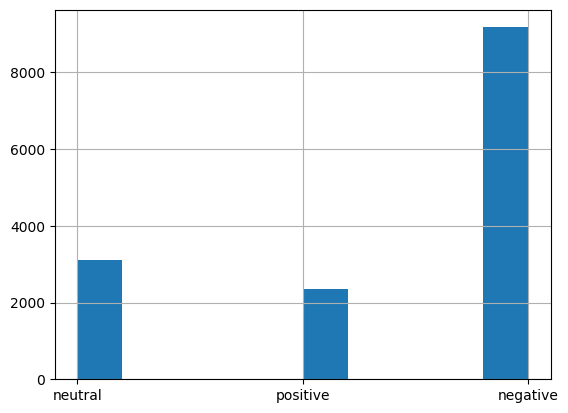

In [17]:
%matplotlib inline
df_['airline_sentiment'].hist()

In [20]:
target_map = {'positive':1.0, 'negative':0.0, 'neutral':2.0}
df_['target'] = df_.airline_sentiment.map(target_map)

In [21]:
df_.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2.0
1,positive,@VirginAmerica plus you've added commercials t...,1.0
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2.0
3,negative,@VirginAmerica it's really aggressive to blast...,0.0
4,negative,@VirginAmerica and it's a really big bad thing...,0.0


In [23]:
df2 = df_[['text','target']]
df2.columns = ['sentence','labels']
df2.to_csv('data_interm_sent.csv', index =None)

In [24]:
!head data_interm_sent.csv

sentence,labels
@VirginAmerica What @dhepburn said.,2.0
@VirginAmerica plus you've added commercials to the experience... tacky.,1.0
@VirginAmerica I didn't today... Must mean I need to take another trip!,2.0
"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0.0
@VirginAmerica and it's a really big bad thing about it,0.0
"@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA",0.0
"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",1.0
"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",2.0


In [25]:
from datasets import load_dataset

In [26]:
raw_dataset = load_dataset('csv', data_files ='data_interm_sent.csv')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-96a8a5a5e66f0e40/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'labels'],
        num_rows: 14640
    })
})

In [29]:
split = raw_dataset['train'].train_test_split(test_size=0.3, seed =42)

In [30]:
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'labels'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'labels'],
        num_rows: 4392
    })
})

In [31]:
checkpoint = 'distilbert-base-cased'

In [33]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [34]:
def tokenize_fn(batch):
    return tokenizer(batch['sentence'], truncation = True)

In [35]:
tokenized_ds = split.map(tokenize_fn, batched = True)

Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

In [36]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels =3)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier

In [37]:
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           2,307
├─Dropout: 1-4                                          --
Total params: 65,783,811
Trainable params: 65,783,811
Non-trainable params: 0

In [39]:
training_args = TrainingArguments(
    output_dir='training_dir',
    evaluation_strategy ='epoch',
    save_strategy='epoch',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64)

In [40]:
def compute_metrics(logits_and_labels):
    logits, labels = logits_and_labels
    predictions = np.argmax(logits, axis=-1)
    acc = np.mean(prediccions == labels)
    f1 = f1_score(labels, predictions, average='macro')
    return {'accuracy':acc, 'f1':f1}
    

In [42]:
trainer = Trainer(model,
                  training_args,
                  train_dataset=tokenized_ds["train"],
                  eval_dataset=tokenized_ds["test"],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

In [ ]:
trainer.train()

In [ ]:
savedmodel = pipeline('text-classification',
                      model = 'training-dir/checkpoint-1282')

In [ ]:
test_pred = savedmodel(split['test']['sentence'])

In [ ]:
config = AutoConfig.from_pretrained(checkpoint)

In [ ]:
config

In [ ]:
config.id2label

In [ ]:
config.label2id

In [ ]:
config.id2label = {v:k for k,v in target_map.items()}
config.label2id = target_map

In [ ]:
model = AutoModelForSequenceClassification.from-pretrained(
    checkpoint, config=config)

In [ ]:
summary(model)

In [ ]:
trainer.train()

#  Excercise 1
#### Evaluate with two classes original vs fine tuned model

# Fine Tuning Multiple Inputs

In [44]:
raw_datasets = load_dataset("glue", "rte")

Generating train split:   0%|          | 0/2490 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/277 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/rte/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [45]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 2490
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 277
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3000
    })
})

In [46]:
raw_datasets['train'].features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['entailment', 'not_entailment'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [47]:
raw_datasets['train']['sentence1'][:10]

['No Weapons of Mass Destruction Found in Iraq Yet.',
 'A place of sorrow, after Pope John Paul II died, became a place of celebration, as Roman Catholic faithful gathered in downtown Chicago to mark the installation of new Pope Benedict XVI.',
 'Herceptin was already approved to treat the sickest breast cancer patients, and the company said, Monday, it will discuss with federal regulators the possibility of prescribing the drug for more breast cancer patients.',
 'Judie Vivian, chief executive at ProMedica, a medical service company that helps sustain the 2-year-old Vietnam Heart Institute in Ho Chi Minh City (formerly Saigon), said that so far about 1,500 children have received treatment.',
 "A man is due in court later charged with the murder 26 years ago of a teenager whose case was the first to be featured on BBC One's Crimewatch. Colette Aram, 16, was walking to her boyfriend's house in Keyworth, Nottinghamshire, on 30 October 1983 when she disappeared. Her body was later found i

In [48]:
checkpoint = 'distilbert-base-cased'

In [49]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [51]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [52]:
tokenizer(raw_datasets['train']['sentence1'][0],
          raw_datasets['train']['sentence2'][0])

{'input_ids': [101, 1302, 20263, 1104, 8718, 14177, 17993, 17107, 1107, 5008, 6355, 119, 102, 20263, 1104, 8718, 14177, 17993, 17107, 1107, 5008, 119, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [53]:
result = _

In [54]:
result.keys()

dict_keys(['input_ids', 'attention_mask'])

In [55]:
tokenizer.decode(result['input_ids'])

'[CLS] No Weapons of Mass Destruction Found in Iraq Yet. [SEP] Weapons of Mass Destruction Found in Iraq. [SEP]'

In [56]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels =2)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier

In [ ]:
training_args = TrainingArguments(
    output_dir = 'training_dir',
    evaluation_strategy = 'epoch',
    save_strategy ='epoch',
    num_train_epochs =1,
    per_device_train_batch_size =16,
    per_device_eval_batch_size = 64,
    logging_steps = 150)